In [2]:
import pandas as pd

In [38]:
# Load data
import os
# 심볼릭 링크로 데이터 연결 상태 (ln -s /data/data/[이하 데이터 파일까지의 경로] ~/aiffel/AIFFEL_quest_rs/Exploration/Ex01/data/ )
# 데이터 경로를 절대경로로 표기하여, 유저 홈 경로는 HOME 환경변수 불러와 사용 : os.getenv() 

data_path = os.getenv("HOME") +'/aiffel/AIFFEL_quest_rs/Exploration/Ex01/data/bike-sharing-demand/train.csv'
orig_data = pd.read_csv(data_path)

In [39]:
data = orig_data.copy()  # 데이터 수정 전 original data를 메모리에 올려 둔 채로 수정본에 작업 : copy()
display(data) 
data.info() # shape(entries, features), dtype of each columns, null_info, memory usage

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [40]:
data.isnull().sum() # 결측치 수: isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [41]:
# 중복 체크
column_keys = data.columns
print(column_keys)
num_entries = len(data)

duplicated = data.duplicated(subset=column_keys) 
print('none unique items in data :%s '%duplicated.sum())
rows = data.loc[data.duplicated(subset=column_keys)]
print(rows) if len(rows) != 0 else print()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
none unique items in data :0 



In [42]:
# datetime to y, m, d, t
data['datetime_converted'] = pd.to_datetime(data['datetime'])

In [43]:
display(data['datetime_converted'])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime_converted, Length: 10886, dtype: datetime64[ns]

In [44]:
data['year']=data['datetime_converted'].dt.year
display(data['year'])

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: year, Length: 10886, dtype: int64

In [47]:
data['month']=data['datetime_converted'].dt.month
data['day']=data['datetime_converted'].dt.day
data['hour']=data['datetime_converted'].dt.hour
data['minute']=data['datetime_converted'].dt.minute
data['second']=data['datetime_converted'].dt.second
display(data)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_converted,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01 04:00:00,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19 19:00:00,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19 20:00:00,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19 21:00:00,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19 22:00:00,2012,12,19,22,0,0


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[]

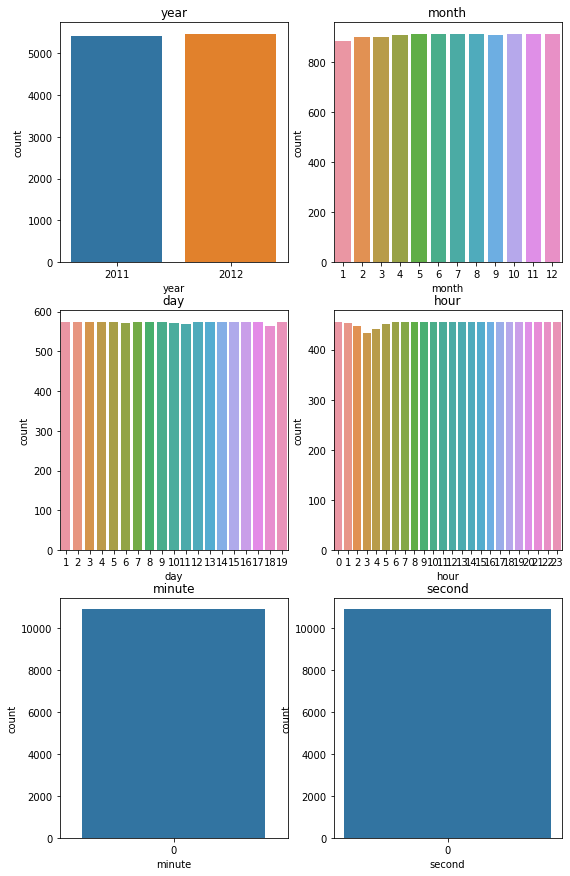

In [60]:
fig, ax = plt.subplots(3,2, figsize=(9, 15))
plt.subplot(3,2,1)
sns.countplot(data=data, x='year')
plt.title("year")
plt.subplot(3,2,2)
sns.countplot(data=data, x='month')
plt.title("month")
plt.subplot(3,2,3)
sns.countplot(data=data, x='day')
plt.title("day")
plt.subplot(3,2,4)
sns.countplot(data=data, x='hour')
plt.title("hour")
plt.subplot(3,2,5)
sns.countplot(data=data, x='minute')
plt.title("minute")
plt.subplot(3,2,6)
sns.countplot(data=data, x='second')
plt.title("second")

plt.plot()

In [64]:
data.info()
selected_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
                   'year', 'month', 'day', 'hour'] # registered, casual column은 제외

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  object        
 1   season              10886 non-null  int64         
 2   holiday             10886 non-null  int64         
 3   workingday          10886 non-null  int64         
 4   weather             10886 non-null  int64         
 5   temp                10886 non-null  float64       
 6   atemp               10886 non-null  float64       
 7   humidity            10886 non-null  int64         
 8   windspeed           10886 non-null  float64       
 9   casual              10886 non-null  int64         
 10  registered          10886 non-null  int64         
 11  count               10886 non-null  int64         
 12  datetime_converted  10886 non-null  datetime64[ns]
 13  year                10886 non-null  int64     

In [65]:
from sklearn.model_selection import train_test_split

train = data[selected_columns]
target= data['count']

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [67]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import mean_squared_error

In [73]:
mse = mean_squared_error(y_test, y_pred)
rmse = (mse)**(1/2)

train_mse = (mean_squared_error(y_train, model.predict(X_train)))**(1/2)
print("train error(rmse):", train_mse)
print("test error(rmse):", rmse)


train error(rmse): 141.74611399309714
test error(rmse): 140.88160407874062


<AxesSubplot:xlabel='humidity', ylabel='count'>

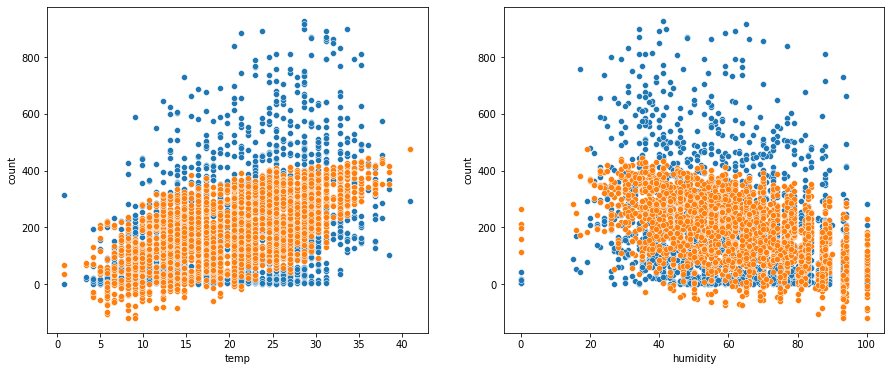

In [80]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data=X_test, x='temp', y=y_test)
sns.scatterplot(data=X_test, x='temp', y=y_pred)
plt.subplot(1,2,2)
sns.scatterplot(data=X_test, x='humidity', y=y_test)
sns.scatterplot(data=X_test, x='humidity', y=y_pred)
